Importing the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
credit_df = pd.read_csv('C:\\ML\\Analytics\\data_science_proj\\Customer segmentation/Marketing_data.csv')

In [3]:
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Checking for any null values in the dataset

In [5]:
credit_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

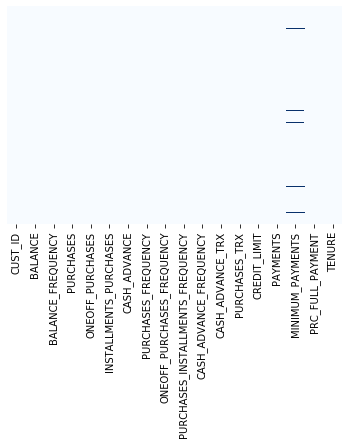

In [6]:
sns.heatmap(credit_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Taking mean to fill the null values

In [7]:
credit_df['MINIMUM_PAYMENTS'] = credit_df['MINIMUM_PAYMENTS'].fillna((credit_df['MINIMUM_PAYMENTS'].mean()))
credit_df['CREDIT_LIMIT'] = credit_df['CREDIT_LIMIT'].fillna((credit_df['CREDIT_LIMIT'].mean()))

In [8]:
credit_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Customer ID won't be of any use so removing it

In [9]:
Credit_df = credit_df.drop(['CUST_ID'],axis=1,inplace = True)

In [10]:
credit_df.shape

(8950, 17)

Using seaborn to see if there is any correlation between the features

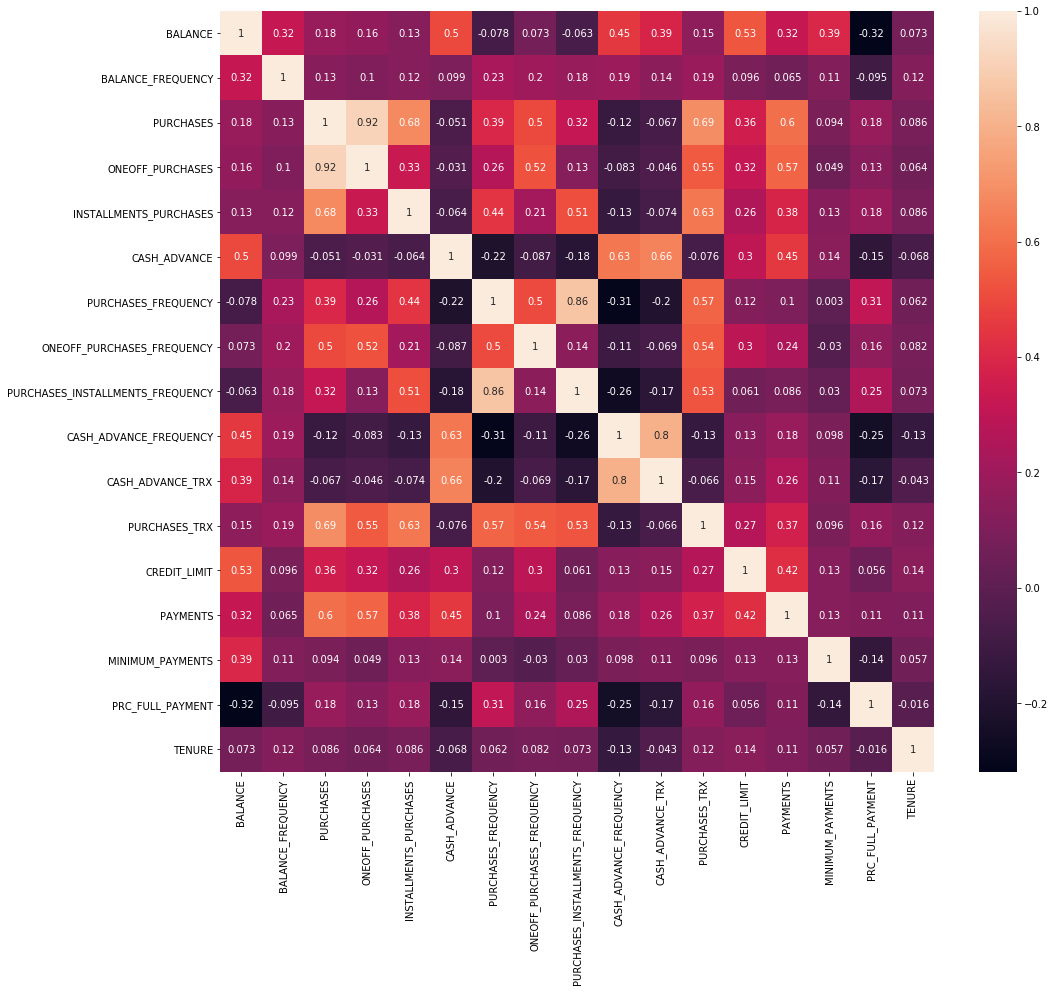

In [11]:
correlations = credit_df.corr()
f, ax = plt.subplots(figsize = (16, 14))
sns.heatmap(correlations, annot = True)
plt.show()


Scaling our data for fitting into K-means model

In [12]:
scaler = StandardScaler()
credit_df_scaled = scaler.fit_transform(credit_df)

Elbow method is used to obtain the optimum k value for clustering

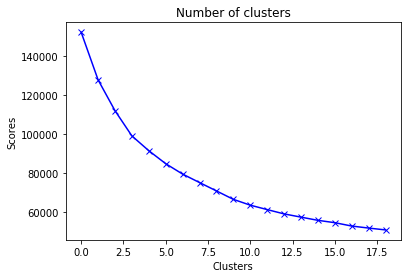

In [13]:
scores_1 = []

k = range(1, 20)

for i in k:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(credit_df_scaled)
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title('Number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

From the above plot we can infer that the k value can be among 7,8,9. So, to know which k-value is optimum, Silhouette method is used.

In [14]:
k_means = KMeans(n_clusters=7)
model = k_means.fit(credit_df_scaled)
y_hat = k_means.predict(credit_df_scaled)
labels = k_means.labels_
metrics.silhouette_score(credit_df_scaled, labels, metric = 'euclidean')
metrics.calinski_harabasz_score(credit_df_scaled, labels)

1359.4371881465106

In [15]:
k_means = KMeans(n_clusters=8)
model = k_means.fit(credit_df_scaled)
y_hat = k_means.predict(credit_df_scaled)
labels = k_means.labels_
metrics.silhouette_score(credit_df_scaled, labels, metric = 'euclidean')
metrics.calinski_harabasz_score(credit_df_scaled, labels)

1331.7163536528008

In [16]:
k_means = KMeans(n_clusters=9)
model = k_means.fit(credit_df_scaled)
y_hat = k_means.predict(credit_df_scaled)
labels = k_means.labels_
metrics.silhouette_score(credit_df_scaled, labels, metric = 'euclidean')
metrics.calinski_harabasz_score(credit_df_scaled, labels)

1274.4650933284686

k=7 is used since it has high silhouette score.

In [17]:
kmeans = KMeans(7)
kmeans.fit(credit_df_scaled)
labels = kmeans.labels_

In [18]:
kmeans.cluster_centers_.shape

(7, 17)

In [19]:
centers = k_means.cluster_centers_

In [20]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [credit_df.columns])
cluster_centers           

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.443847,0.414656,7.093187,6.244031,5.297641,0.004274,1.081960,1.867817,1.035380,-0.299540,-0.116878,4.699112,2.171463,4.847281,1.104788,0.830765,0.333341
1,0.136638,0.430241,0.947732,0.899644,0.588079,-0.306219,1.094985,1.867151,0.541773,-0.407415,-0.316506,1.210700,0.708734,0.397853,-0.032755,0.456706,0.307767
2,1.675127,0.394566,-0.200657,-0.147856,-0.202902,2.001377,-0.450986,-0.185470,-0.399996,1.914854,1.930787,-0.236200,1.014907,0.838218,0.556042,-0.391353,0.067512
3,-0.370523,0.331560,-0.042700,-0.233421,0.327700,-0.369160,0.974567,-0.353129,1.164887,-0.478935,-0.363498,0.167399,-0.277324,-0.224886,-0.030447,0.302185,0.252842
4,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
5,-0.701892,-2.133061,-0.306988,-0.230376,-0.302512,-0.323199,-0.547007,-0.427927,-0.441323,-0.522378,-0.376899,-0.416546,-0.172708,-0.201973,-0.257603,0.294319,0.200916
6,0.010411,0.402063,-0.344508,-0.225326,-0.400512,-0.100141,-0.815249,-0.336943,-0.757178,0.091308,-0.036514,-0.466220,-0.300842,-0.246256,-0.014736,-0.451896,0.272118


Inverse transform is done to get better understanding on what kind of customers each cluster represents.

In [21]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [credit_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4569.720859,0.975499,16157.907683,10956.249146,5201.658537,987.833746,0.924593,0.759664,0.775924,0.075203,2.451220,131.512195,12395.121951,15765.548522,3438.869446,0.396699,11.963415
1,1848.876256,0.979191,3028.049284,2085.661330,942.860024,336.716284,0.929821,0.759465,0.579752,0.053616,1.088906,44.803304,7073.113511,2884.890459,787.871958,0.287293,11.929190
2,5051.110362,0.970740,574.498681,347.027204,227.586099,5175.851740,0.309348,0.147128,0.205469,0.518326,16.425028,8.838782,8187.096444,4159.702011,2160.039610,0.039251,11.607666
3,793.263383,0.955814,911.975010,205.006628,707.402434,204.724853,0.881491,0.097113,0.827393,0.039304,0.768222,18.870748,3485.432557,1082.120483,793.251325,0.242098,11.855685
4,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
5,103.545582,0.371968,347.320446,210.060564,137.509714,301.107446,0.270810,0.074799,0.189044,0.030611,0.676768,4.356061,3866.068556,1148.450501,263.874513,0.239798,11.786195
6,1586.144799,0.972516,267.157499,218.442487,48.889573,768.871103,0.163152,0.101941,0.063516,0.153416,2.999647,3.121340,3399.864785,1020.255527,829.864835,0.021543,11.881481


From the above we can infer that cluster2 represents wealthy customers who do frequent purchases and transactions. They can be updated with top-end credit cards.

In [22]:
y_kmeans = kmeans.fit_predict(credit_df_scaled)
y_kmeans

array([1, 4, 5, ..., 6, 6, 6])

Concatenating the clusters labels to our original dataframe

In [23]:
credit_df_cluster = pd.concat([credit_df, pd.DataFrame({'cluster':labels})], axis = 1)
credit_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


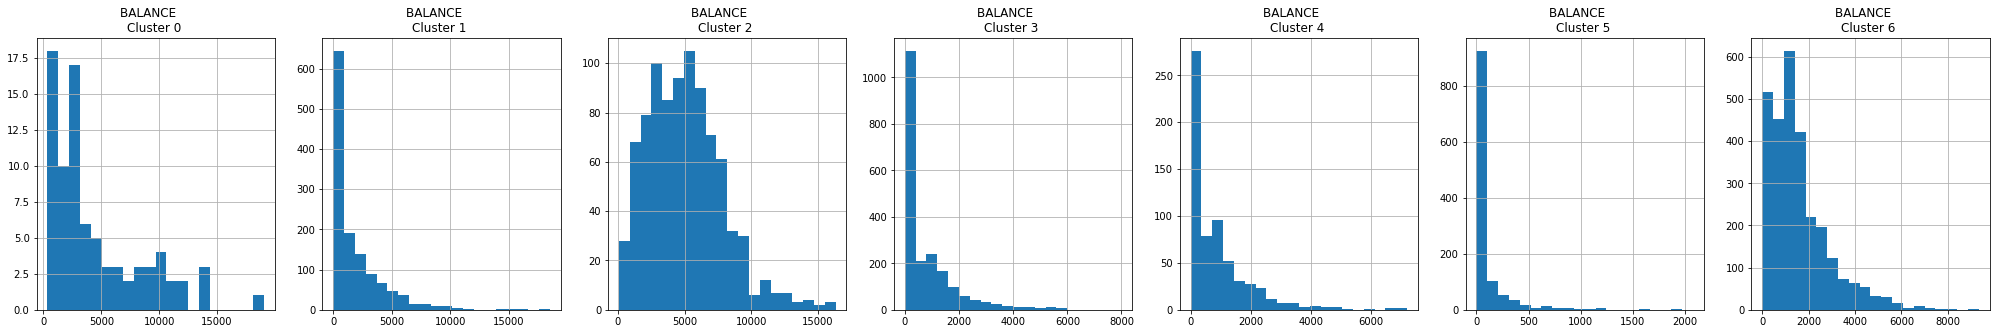

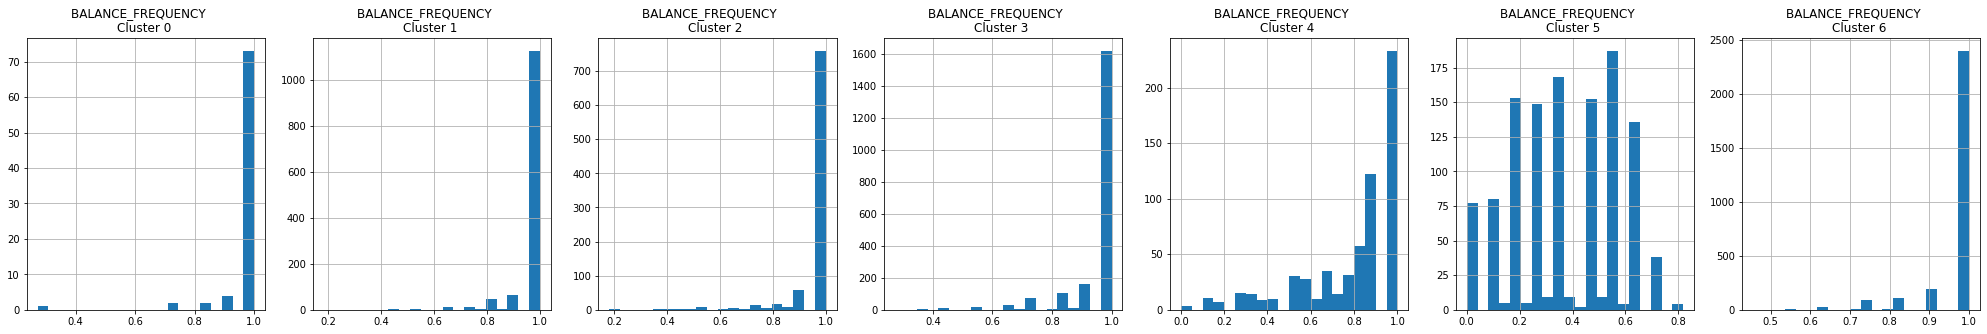

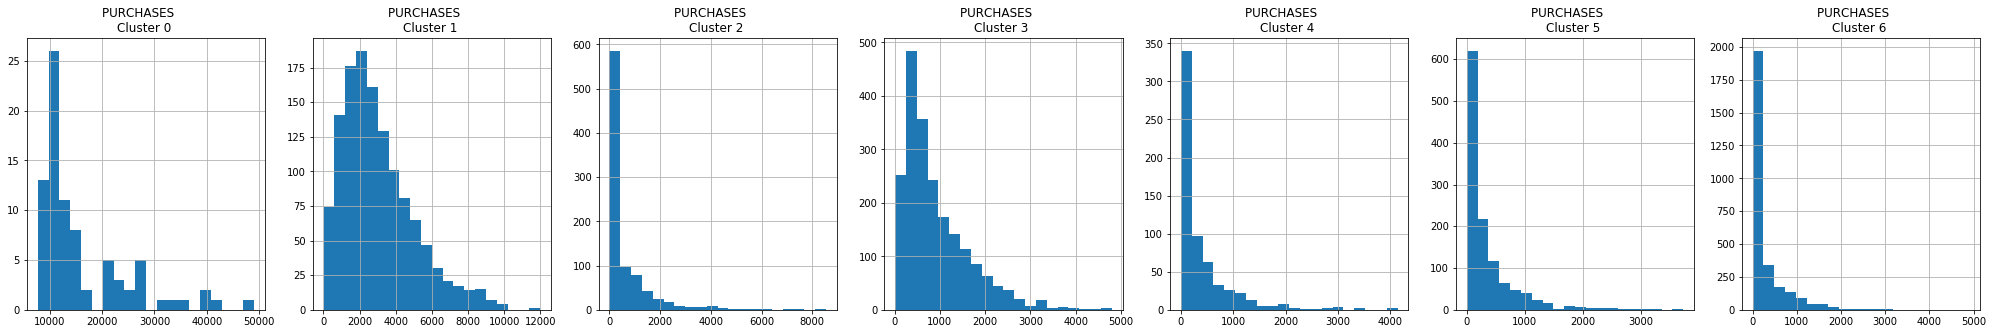

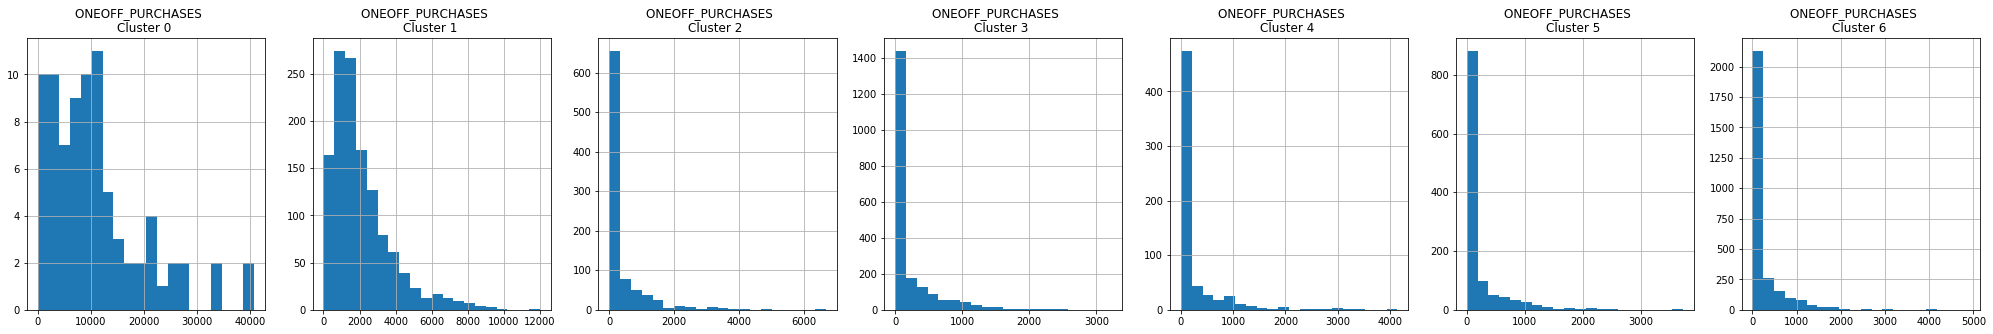

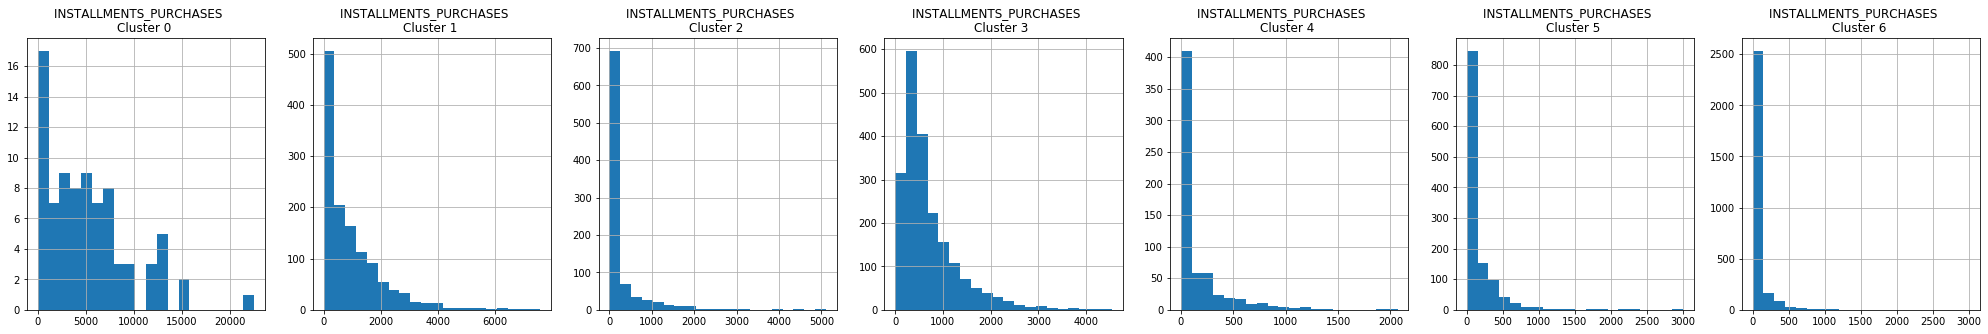

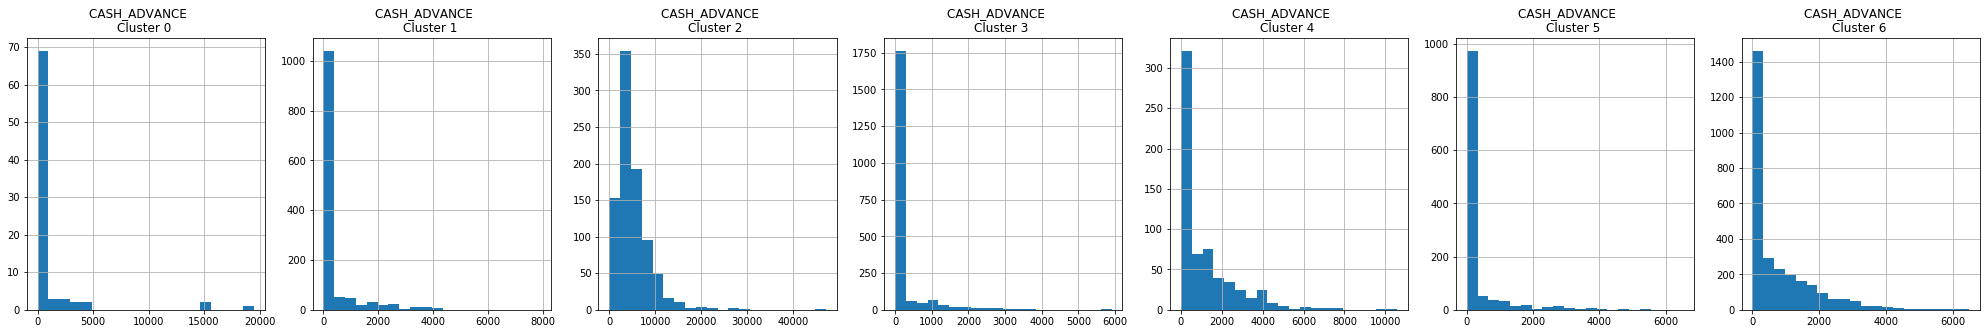

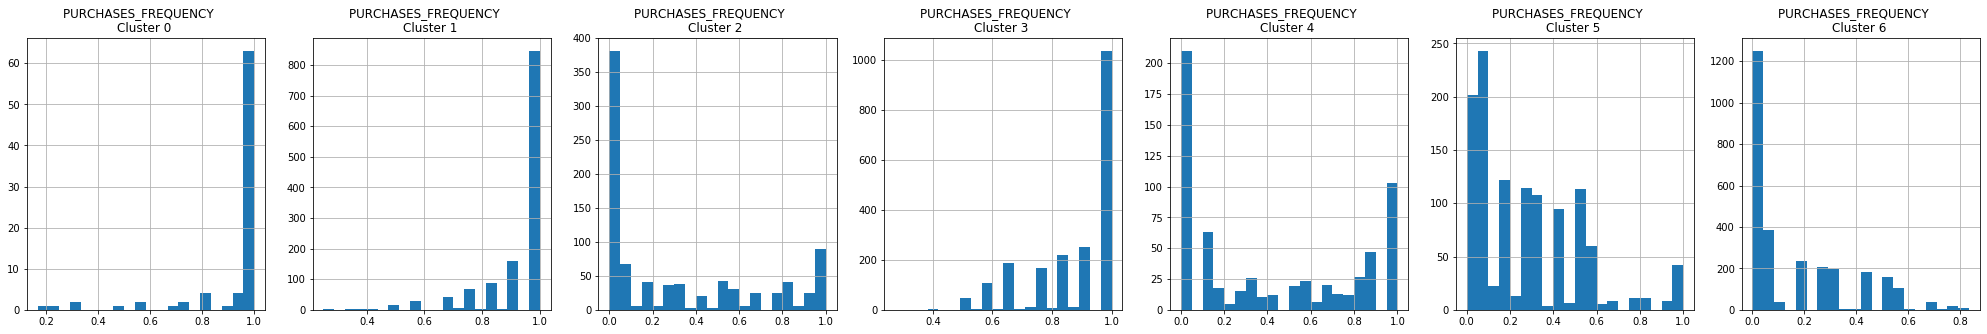

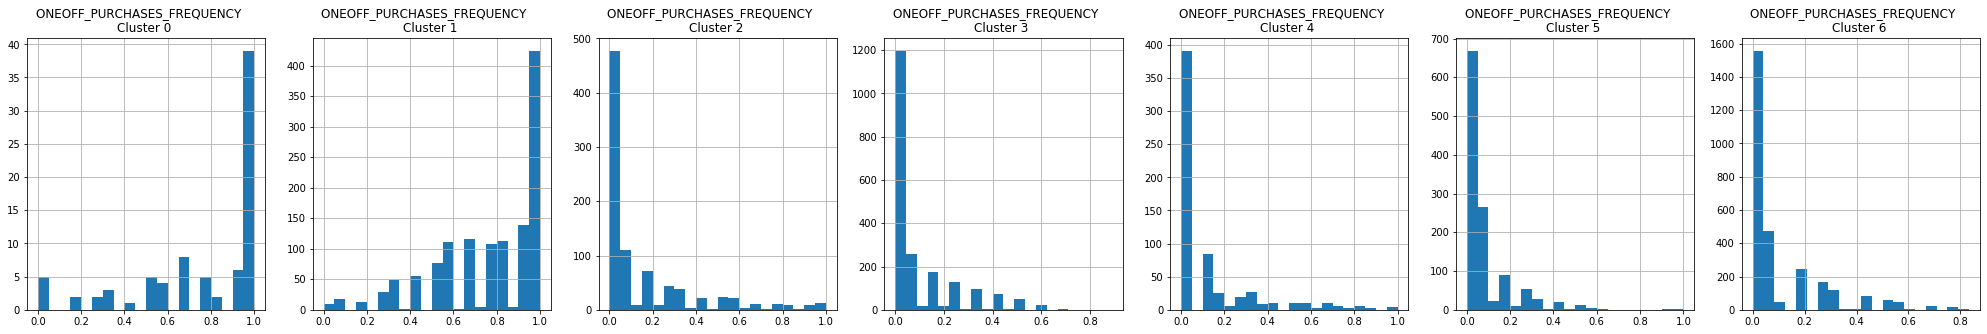

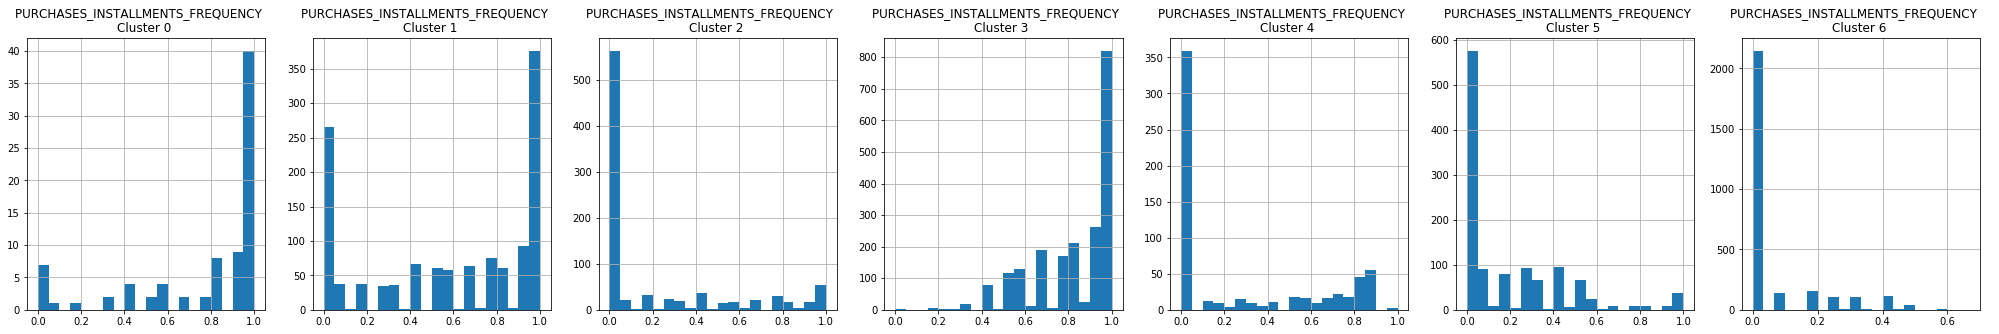

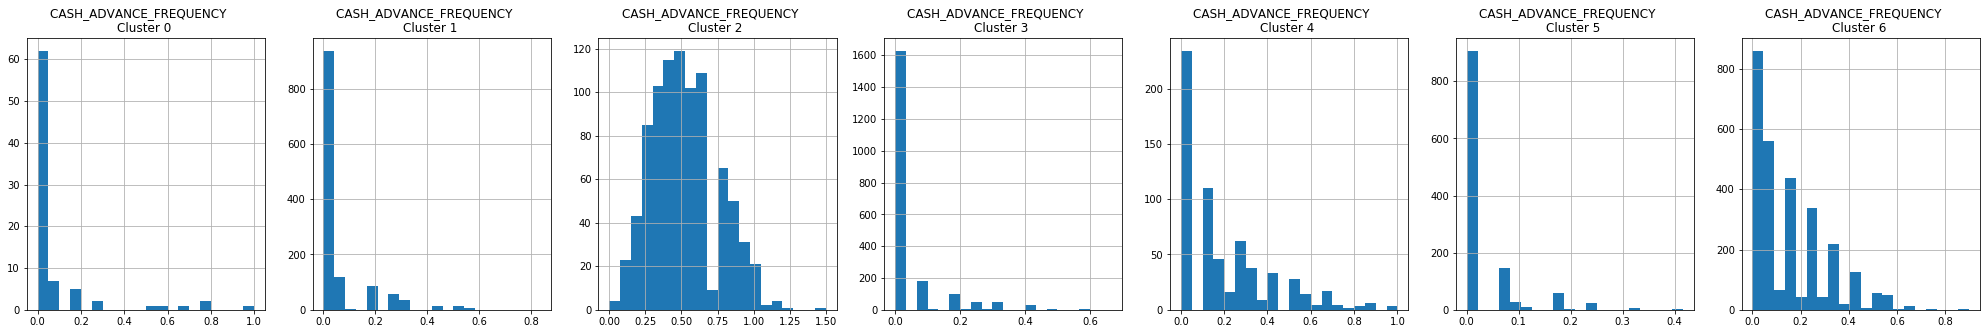

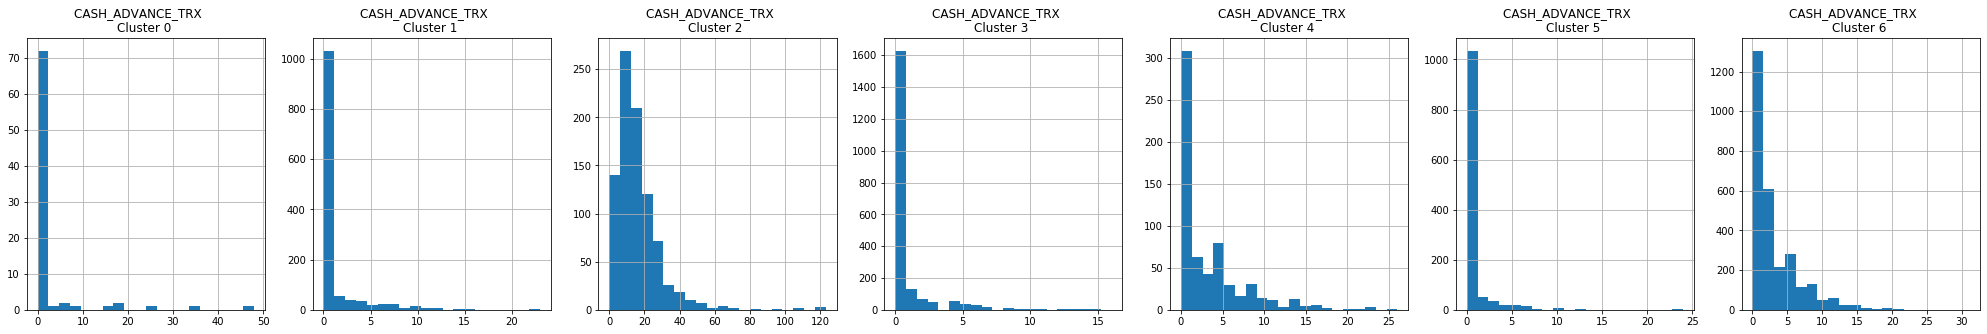

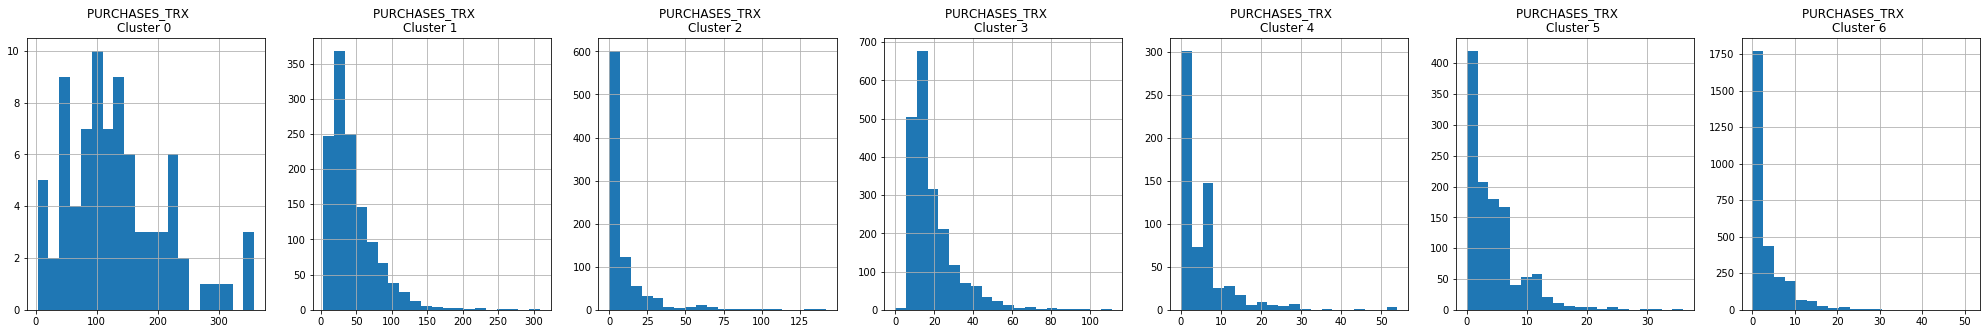

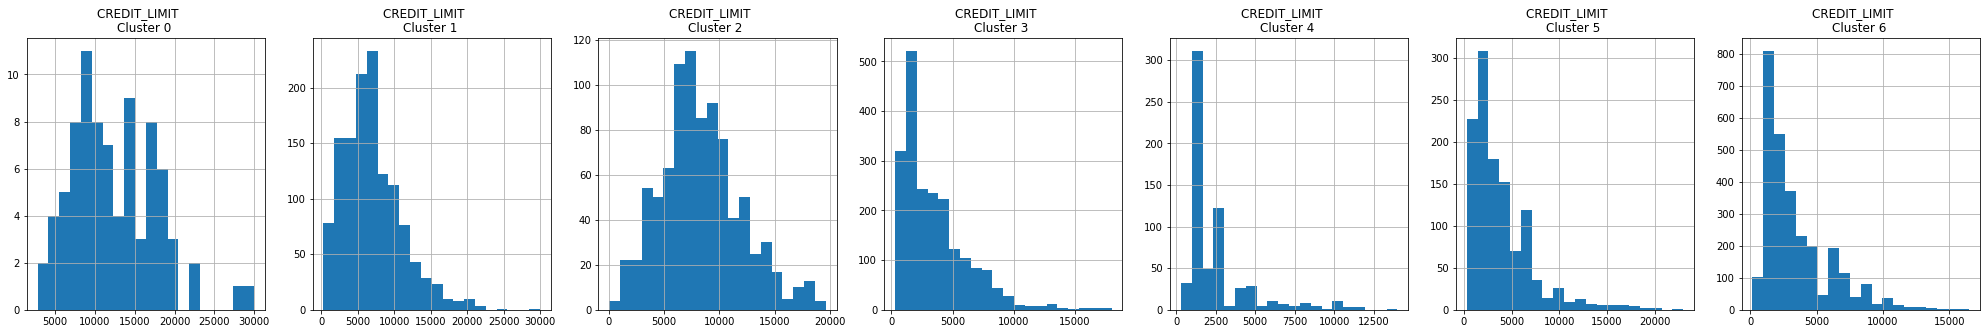

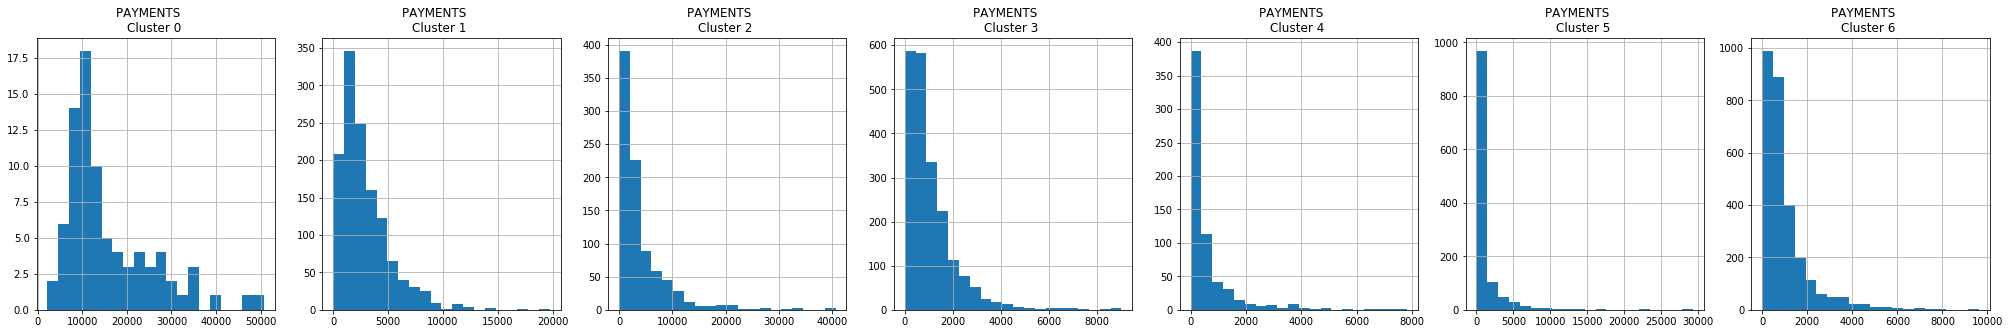

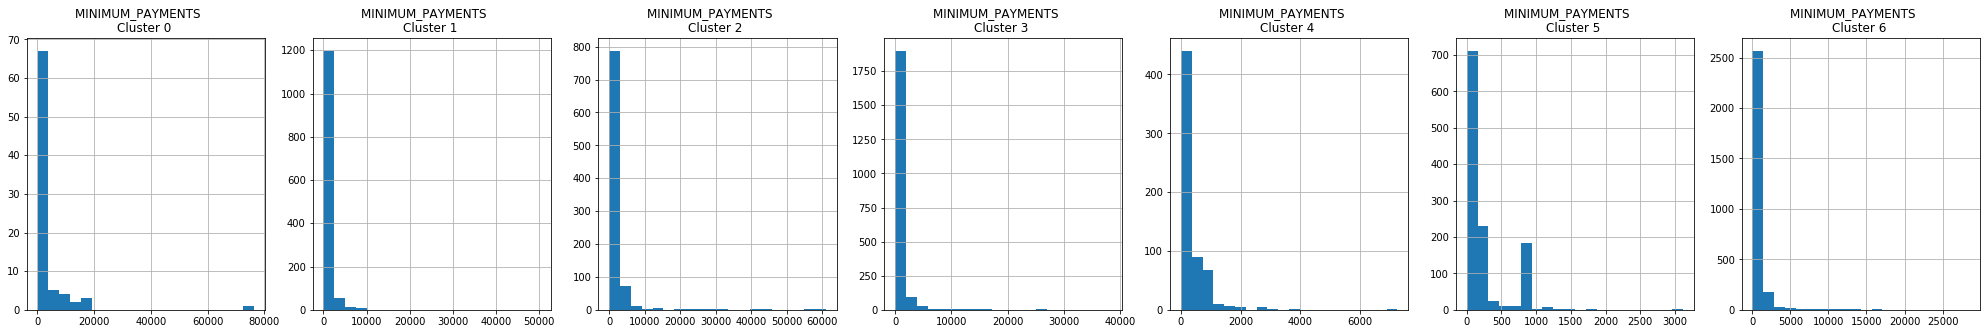

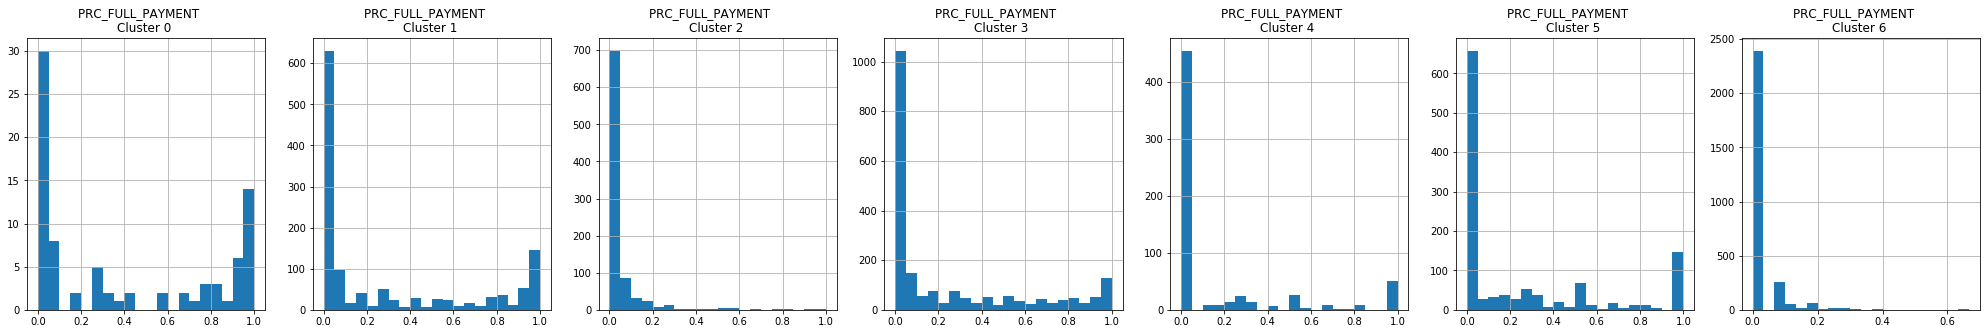

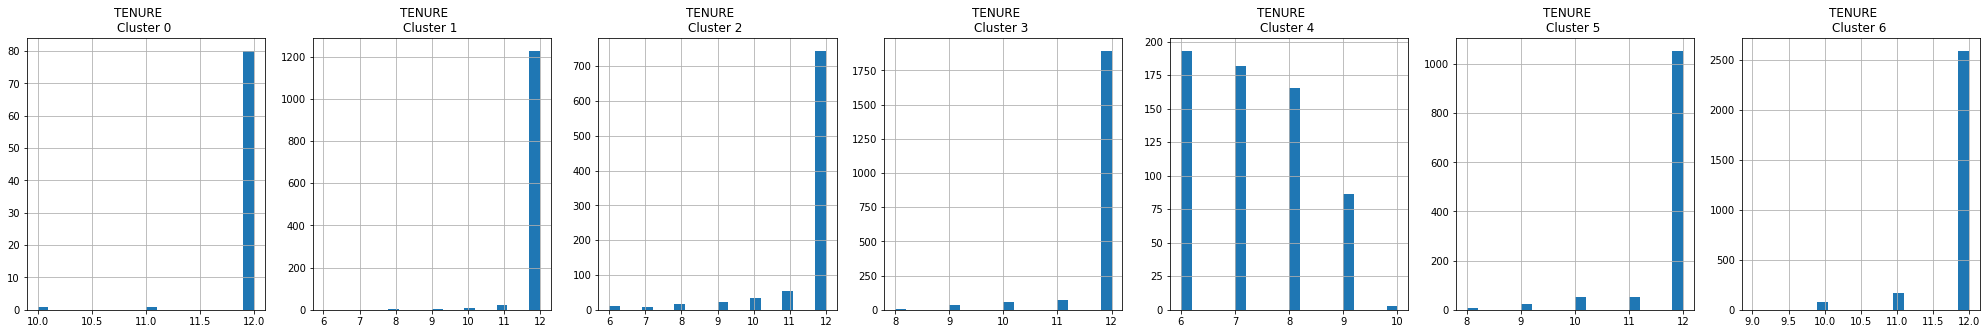

In [24]:
# Plot the histogram of various clusters
for i in credit_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = credit_df_cluster[credit_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



For better visualization and understanding of clustering PCA is used.

In [25]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(credit_df_scaled)
principal_comp

array([[-1.6822199 , -1.07644955],
       [-1.13829467,  2.50648208],
       [ 0.96968825, -0.38349597],
       ...,
       [-0.92620369, -1.81078941],
       [-2.33655356, -0.65797965],
       [-0.55642309, -0.40046968]])

In [26]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138295,2.506482
2,0.969688,-0.383496
3,-0.873627,0.043172
4,-1.599434,-0.688582


In [27]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076450,6
1,-1.138295,2.506482,2
2,0.969688,-0.383496,1
3,-0.873627,0.043172,6
4,-1.599434,-0.688582,6


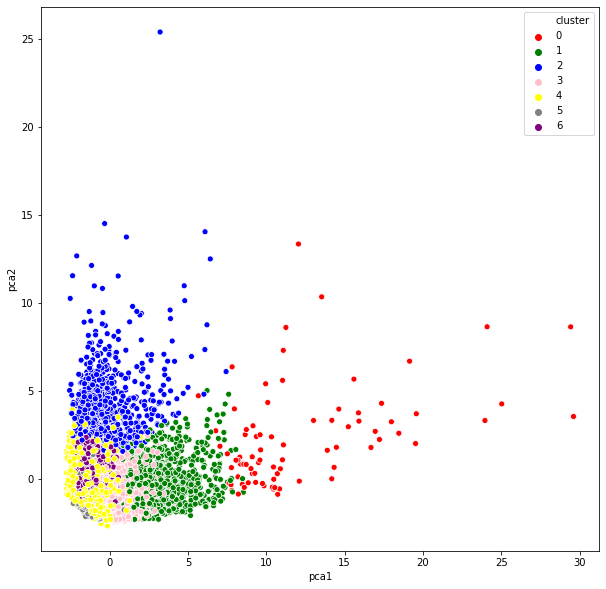

In [28]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

Autoencoder is used for dimensionality reduction. We have 7 clusters, what if we need only 3-4 clusters. For that purpose dimensions are reduced. It works only if there is some collinearity between the features.

In [29]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x) #no of features required

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimension reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [30]:
credit_df_scaled.shape

(8950, 17)

In [31]:
autoencoder.fit(credit_df_scaled, credit_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 2s 26ms/step - loss: 0.5533
Epoch 2/25
70/70 [==============================] - 2s 27ms/step - loss: 0.2674
Epoch 3/25
70/70 [==============================] - 2s 28ms/step - loss: 0.1895
Epoch 4/25
70/70 [==============================] - 2s 27ms/step - loss: 0.1545
Epoch 5/25
70/70 [==============================] - 2s 28ms/step - loss: 0.1383
Epoch 6/25
70/70 [==============================] - 2s 29ms/step - loss: 0.1186
Epoch 7/25
70/70 [==============================] - 2s 28ms/step - loss: 0.1031
Epoch 8/25
70/70 [==============================] - 2s 29ms/step - loss: 0.0943
Epoch 9/25
70/70 [==============================] - 2s 29ms/step - loss: 0.0930
Epoch 10/25
70/70 [==============================] - 2s 30ms/step - loss: 0.0799
Epoch 11/25
70/70 [==============================] - 2s 27ms/step - loss: 0.0763
Epoch 12/25
70/70 [==============================] - 2s 26ms/step - loss: 0.0661
Epoch 13/25
70/70 [==================

In [32]:
autoencoder.save_weights('C:\\ML\\Analytics\\data_science_proj\\Customer segmentation/autoencodermodel.h5')

In [33]:
pred = encoder.predict(credit_df_scaled)

In [34]:
pred.shape

(8950, 10)

Once again using Elbow method for finding optimum k value.

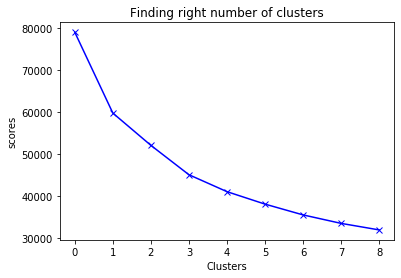

In [35]:
scores_2 = []

range_values = range(1, 10)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

Silhouette method is used to finalise the no of clusters.

In [36]:
k_means = KMeans(n_clusters=3)
model = k_means.fit(pred)
y_hat = k_means.predict(pred)
labels = k_means.labels_
metrics.silhouette_score(pred, labels, metric = 'euclidean')
metrics.calinski_harabasz_score(pred, labels)

2315.941167246653

In [37]:
k_means = KMeans(n_clusters=4)
model = k_means.fit(pred)
y_hat = k_means.predict(pred)
labels = k_means.labels_
metrics.silhouette_score(pred, labels, metric = 'euclidean')
metrics.calinski_harabasz_score(pred, labels)

2248.3906807355197

In [38]:
k_means = KMeans(n_clusters=5)
model = k_means.fit(pred)
y_hat = k_means.predict(pred)
labels = k_means.labels_
metrics.silhouette_score(pred, labels, metric = 'euclidean')
metrics.calinski_harabasz_score(pred, labels)

2071.37359808191

Comparing Elbow methods result before nd after using Autoencoder.

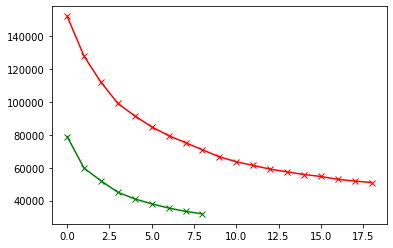

In [39]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

Using autoencoder reduced the features and number of clusters.

In [40]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(credit_df_scaled)

In [41]:
df_cluster_dr = pd.concat([credit_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [42]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.979600,-0.259749
1,0.726976,2.055181
2,-0.108525,-0.664037
3,-0.869702,-0.015948
4,-1.889384,-0.099397


In [43]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.979600,-0.259749,2
1,0.726976,2.055181,0
2,-0.108525,-0.664037,2
3,-0.869702,-0.015948,2
4,-1.889384,-0.099397,2


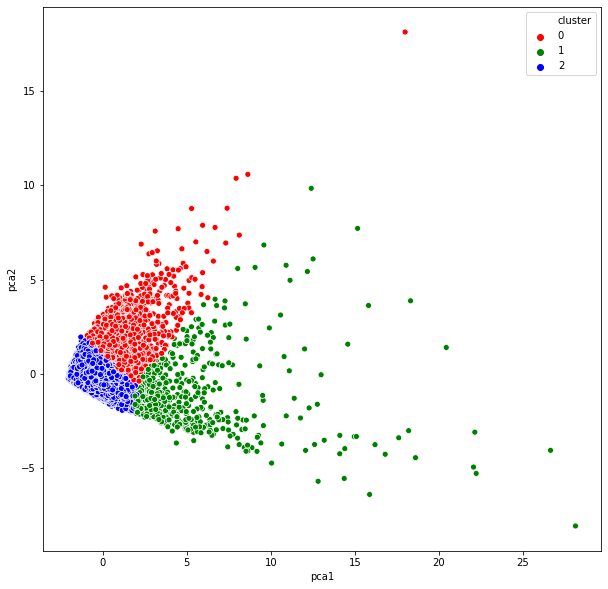

In [44]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue'])
plt.show()